# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:

import numpy as np
import pandas as pd
from glob import glob
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))



There are 13233 total human images.
There are 8351 total dog images.


In [2]:
print(dog_files[:5])

['/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg'
 '/data/dog_images/train/103.Mastiff/Mastiff_06826.jpg'
 '/data/dog_images/train/103.Mastiff/Mastiff_06871.jpg'
 '/data/dog_images/train/103.Mastiff/Mastiff_06812.jpg'
 '/data/dog_images/train/103.Mastiff/Mastiff_06831.jpg']


In [3]:
#processing the path to extract the breed

def process_path(array):
    '''
    Function to process the array that contains the path to the images and 
    extract the breed of the dogs that they folders have.
    input: 
    array: (array) array with all the paths to the folder with the images.
    output: 
    array with all the breeds that are in the array. Not unique.
    '''
    
    return np.array([re.split(r'[.]', x)[-1] for x in array])


In [4]:
#Getting to know how many different breeds are there in the data set of dogs


# using glob to open all the files with the corresponding startting.
# This is before entering to the folder with the images
breeds = np.array(glob("/data/dog_images/*/*"))
breeds_total =process_path(breeds)

# Getting the names of the different breeds, for further use later.
breed_name = set(breeds_total)

# Printing the number of breeds in the data set.
print('There are {} breeds in the data of dogs'.format(len(breed_name)))

There are 133 breeds in the data of dogs


In [5]:
#Distribution os the images

# breeds_train = np.array(glob('data/dog_images/train/*'))
# breeds_valid = np.array(glob('data/dog_images/valid/*'))
# breeds_test= np.array(glob('data/dog_images/test/*'))


FOLDERS = ['train', 'test','valid']
ROOT = '/data/dog_images/'

for i in FOLDERS:
    #Create the direction in the memory
    path = os.path.join(ROOT, i)
    
    #Use glob to have all the directories
    full =np.array(glob(path+'/*'))
    
    #Use the processing function to get all the breeds
    breeds = set(process_path(full))
    
    print('There are {} breeds in the '.format(len(breeds))+i+' data of the dogs')
    
    
# print('There are {} breeds in the train data of dogs'.format(len(breed_name)))

There are 133 breeds in the train data of the dogs
There are 133 breeds in the test data of the dogs
There are 133 breeds in the valid data of the dogs


### Data Exploration

In [6]:
# Get the number of photos per breed in the data set.



# Put the number of photos per carpet in an array

#Dictionary that will contain the dataframes for each type of folder.
dfs = {}

#Check the folder for each category, and add an element to the arrays 
# so then we can create a dataframe based on the two elements of information 
# that we are going to get.

for cat in FOLDERS:
    #path
    folders = np.array(glob(ROOT+cat+'/*'))

    #Arrays for the info about the breed and number of photos in the folder
    breeds = []
    photos = []
    for path in folders:
        breeds.append(process_path([path])[0])
        photos.append(len(np.array(glob(path+'/*'))))
    
    # Create the corresponding dictionary
    total_photos = {'Breed_'+cat:breeds,
                    'Num_photos_'+cat:photos}

    #Create the corresponding dataframe to store in the dictionary of dataframes
    dfs['df_'+cat]=  pd.DataFrame(total_photos)

In [7]:
def duplicated_colums(df):
    '''
    Method to find the duplicated columns in a data frame
    input
    df (dataframe): data frame to check its columns
    return
    list with the names of the duplicated columns.
    '''
    
    duplicated = []
    n = df.shape[1]
    for i in range(n):
        base = df.iloc[:,i]
        for j in range(i+1,n):
            compare = df.iloc[:,j]
            if all(base == compare):
                
                if df.columns[i] not in duplicated:
                    duplicated.append(df.columns[j])
    
    return duplicated

In [8]:
a= [1,2,3,4,5]
b=[1,2,3,4,5]

dictio = {0:a,1:b}
df = pd.DataFrame(dictio)

duplicated_colums(df)

[1]

In [9]:
df = pd.concat(dfs, ignore_index=True,axis =1)
df.head()

,0,1,2,3,4,5
0,Mastiff,7,Mastiff,58,Mastiff,7
1,Doberman_pinscher,6,Doberman_pinscher,47,Doberman_pinscher,6
2,Curly-coated_retriever,7,Curly-coated_retriever,50,Curly-coated_retriever,6
3,Borzoi,7,Borzoi,56,Borzoi,7
4,Bichon_frise,8,Bichon_frise,62,Bichon_frise,7


In [10]:
#Just run this cell once, if more, then run the one in which the dictionary of data frames was created.
df['Total']= df.iloc[:,1]+ df.iloc[:,3] + df.iloc[:,5]
df.rename(columns={0:'Breeds'}, inplace=True )
df.head()


,Breeds,1,2,3,4,5,Total
0,Mastiff,7,Mastiff,58,Mastiff,7,72
1,Doberman_pinscher,6,Doberman_pinscher,47,Doberman_pinscher,6,59
2,Curly-coated_retriever,7,Curly-coated_retriever,50,Curly-coated_retriever,6,63
3,Borzoi,7,Borzoi,56,Borzoi,7,70
4,Bichon_frise,8,Bichon_frise,62,Bichon_frise,7,77


In [11]:
samecol= duplicated_colums(df)

With the previous we are sure that the breeds are in the same order in every column. Therefore we can just get rid of them 

In [12]:
to_drop = samecol+[1,3,5]

df.drop(columns=to_drop, inplace=True)

df

,Breeds,Total
0,Mastiff,72
1,Doberman_pinscher,59
2,Curly-coated_retriever,63
3,Borzoi,70
4,Bichon_frise,77
5,Chinese_crested,63
6,Finnish_spitz,42
7,Welsh_springer_spaniel,55
8,Bedlington_terrier,60
9,Papillon,79


In [13]:
df.sort_values(by='Total', ascending=False, inplace=True)

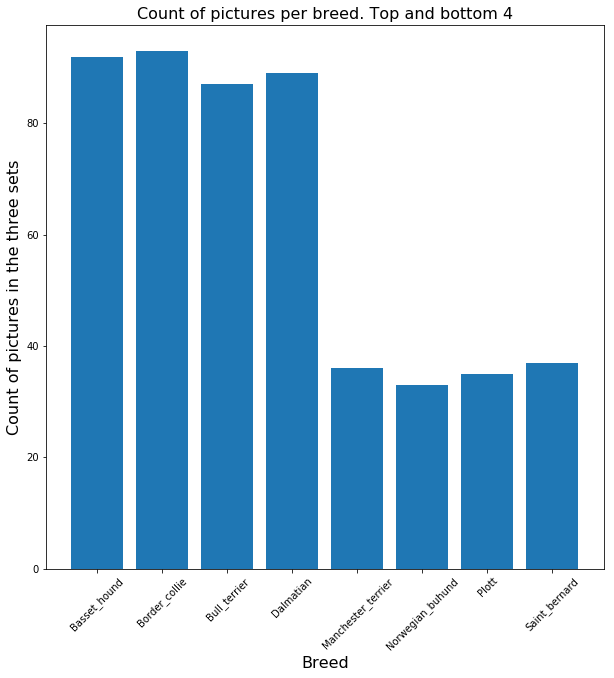

In [14]:
data = df.iloc[list(range(1,5))+list(range(-5,-1)),:]
plt.figure(figsize=(10,10))
plt.bar(x=data.Breeds, height=data.Total)
plt.ylabel('Count of pictures in the three sets', fontsize = 16)
plt.xticks(fontsize = 10, rotation = 45)
plt.xlabel('Breed', fontsize = 16)
plt.title('Count of pictures per breed. Top and bottom 4' , fontsize  =16);


In [15]:

df2.head()

NameError: name 'df2' is not defined

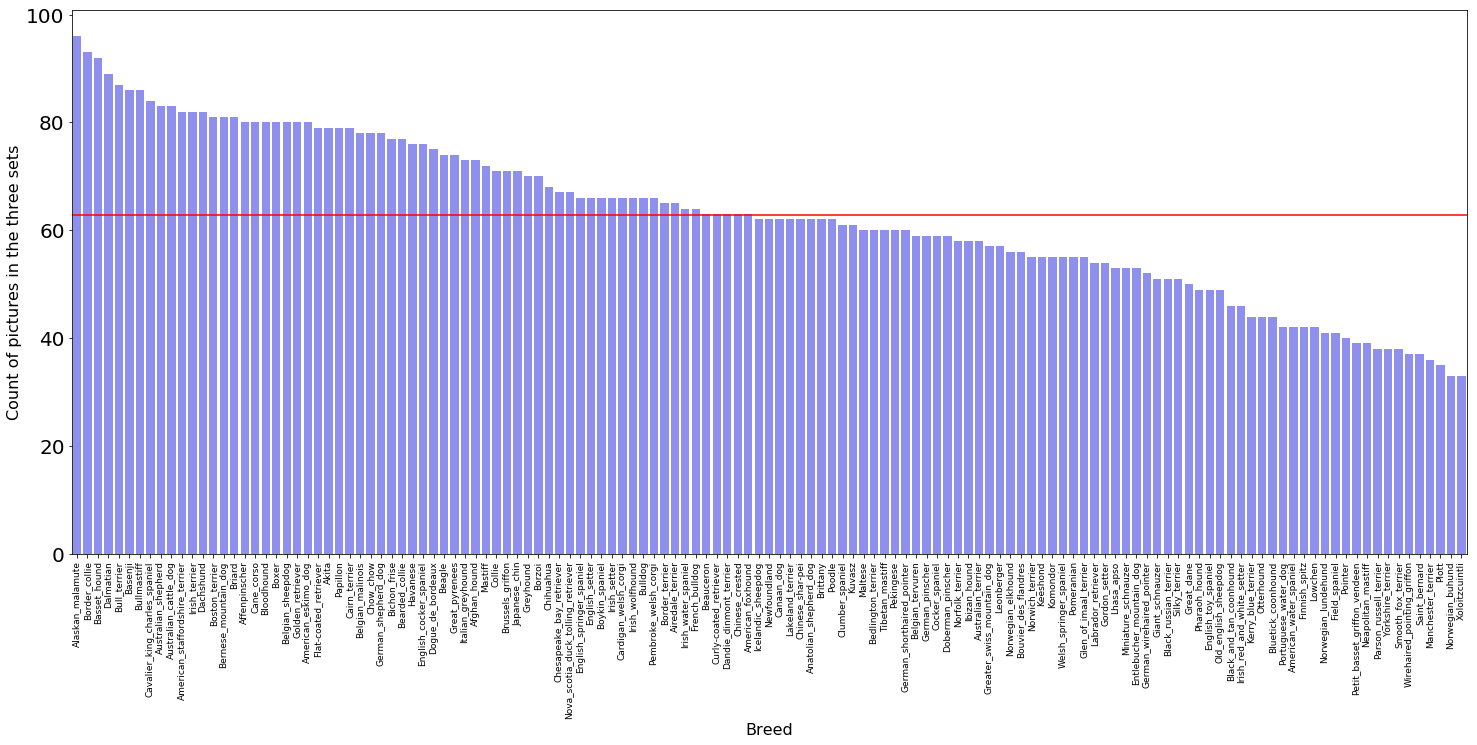

In [16]:
import seaborn as sns

mean = df.Total.mean()

df2 = df.sort_values(by=['Total'], ascending=False)
df2.reset_index(inplace = True, drop=True)

plt.figure(figsize=(25,10))
sns.barplot(data = df2, x='Breeds', y='Total' , color='b', alpha = 0.5)
plt.ylabel('Count of pictures in the three sets', fontsize = 16)
plt.xticks(fontsize = 9, rotation = 90)
plt.yticks(fontsize = 20)
plt.hlines(mean, xmin=-5, xmax=135, colors='r');
plt.xlabel('Breed', fontsize = 16);


In [17]:
N_BREEDS = 133

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


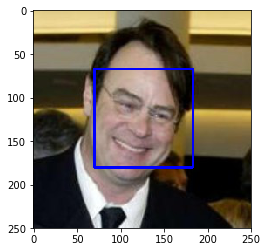

In [18]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [19]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

For the small sample of pictures selected below, we found the following: 

**Humans**: 98% of the pictures were classified correctly as humans.

**Dogs**: 17% of the pictures were misclassified as humans.

In [20]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

humans = np.sum([face_detector(path) for path in human_files_short])/len(human_files_short)
print('The percentage of good classified humans is: {}'.format(humans))
dogs = np.sum([face_detector(path) for path in dog_files_short])/len(dog_files_short)
print('The percentage of wrongly classified dogs is: {}'.format(dogs))

The percentage of good classified humans is: 0.98
The percentage of wrongly classified dogs is: 0.17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [21]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 109970311.51it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [22]:
from PIL import Image
import torchvision.transforms as transforms

# ----------------------------------
# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# -------------------------------


def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # --------------------------------------------------------------------------
    # solution
    # --------------------------------------------------------------------------
    
    #Preprocessing
    preprocess = transforms.Compose([
        transforms.RandomResizedCrop(size = 224), #Resize the picture as VGG accepts only 224x224x3 y design.
        transforms.RandomHorizontalFlip(p=0.6), #Perform a horizontal flip with a probability of 60%
        transforms.RandomRotation(degrees = 45), #Perform a rotation of the picture 45 degrees
        transforms.ToTensor(), # Transform it to a tensor.
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Normalize the values.
    ])
    
    #Loading the image
    image = Image.open(img_path)
    
    # Preprocess the image before passing it to the model.
    img1 = preprocess(image)
    img1 = img1.unsqueeze(0)
    img1 = img1.cuda()

    # Feeding the input to the model
    pred = VGG16(img1.float())
    
    return torch.argmax(pred).cpu().numpy().tolist() # predicted class index

In [23]:
alpha = VGG16_predict(dog_files_short[26])
alpha

243

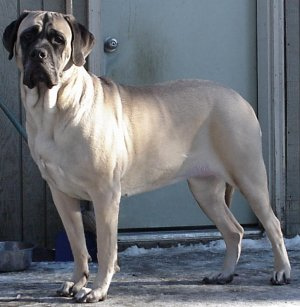

In [24]:
image = Image.open(dog_files[1])
image

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [25]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    #------------------------------------
    # Solution
    # ------------------------------------
    
    #use the predictor that we just created
    index = VGG16_predict(img_path)
    
    
    return (151<=index & index <= 268)

In [26]:

def VGG16_predict_2(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # --------------------------------------------------------------------------
    # solution
    # --------------------------------------------------------------------------
    
    #Preprocessing
    preprocess = transforms.Compose([
        transforms.RandomResizedCrop(size = 224), #Resize the picture as VGG accepts only 224x224x3 y design.
        transforms.ToTensor(), # Transform it to a tensor.
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Normalize the values.
    ])
    
    #Loading the image
    image = Image.open(img_path)
    
    # Preprocess the image before passing it to the model.
    img1 = preprocess(image)
    img1 = img1.unsqueeze(0)
    img1 = img1.cuda()

    # Feeding the input to the model
    pred = VGG16(img1.float())
    
    return torch.argmax(pred).cpu().numpy().tolist() # predicted class index


In [27]:
def dog_detector_2(img_path):
    ## TODO: Complete the function.
    
    #------------------------------------
    # Solution
    # ------------------------------------
    
    #use the predictor that we just created
    index = VGG16_predict_2(img_path)
    
    return 151<=index & index <= 268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

1. For the stressed model, that has a lot of transformations prior to the testing: 

    * The percentage of humans wrongly classified as dogs is 1%

    * The percentage of dogs classified as dogs by the model is 79%


2. For the unstressed test, less transformations to the pictures, we have the following:

    * The percentage of humans wrongly classified as dogs is still 2%

    * The percentage of dogs classified as dogs by the model is 99%



In [28]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

humans = np.sum([dog_detector(path) for path in human_files_short])/len(human_files_short)
print('The proportion of dogs in the human pictures is: {}'.format(humans))
dogs = np.sum([dog_detector(path) for path in dog_files_short])/len(dog_files_short)
print('The proportion of dogs found by the model is: {}'.format(dogs))


humans = np.sum([dog_detector_2(path) for path in human_files_short])/len(human_files_short)
print('\n The proportion of dogs in the human pictures with the simple setting is: {}'.format(humans))
dogs = np.sum([dog_detector_2(path) for path in dog_files_short])/len(dog_files_short)
print('The proportion of dogs found by the model with the simple setting is: {}'.format(dogs))

The proportion of dogs in the human pictures is: 0.01
The proportion of dogs found by the model is: 0.79

 The proportion of dogs in the human pictures with the simple setting is: 0.02
The proportion of dogs found by the model with the simple setting is: 0.99


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [71]:

# define Inception-v3 model
resnet = models.resnet50(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    resnet = resnet.cuda()

In [76]:
# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# -------------------------------


def resnet_predict(img_path):
    '''
    Use pre-trained Inception-v3 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to prediction of Inception-v3 model's prediction
    '''
    
    # --------------------------------------------------------------------------
    # solution
    # --------------------------------------------------------------------------
    
    #Preprocessing
    preprocess_resnet = transforms.Compose([
        transforms.RandomResizedCrop(size = 224), #Resize the picture as inception accepts 299
        transforms.RandomHorizontalFlip(p=0.6), #Horizontal flip of the image with probability 0.6
        transforms.RandomRotation(degrees=45), #Make a random rotation of a 45 degrees angle.
        transforms.ToTensor(), # Transform it to a tensor.
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Normalize the values.
    ])
    
    #Loading the image
    image = Image.open(img_path)
    # Preprocess the image before passing it to the model.
    input_tensor = preprocess_resnet(image)
    
    #unsqueeze the tensor
    img1 = input_tensor.unsqueeze(0)
    img1 = img1.cuda()

    # Feeding the input to the model
    pred = resnet(img1.float())
    
    return torch.argmax(pred).cpu().numpy().tolist() # predicted class index




In [77]:
resnet.eval()
resnet_predict(dog_files_short[23])

243

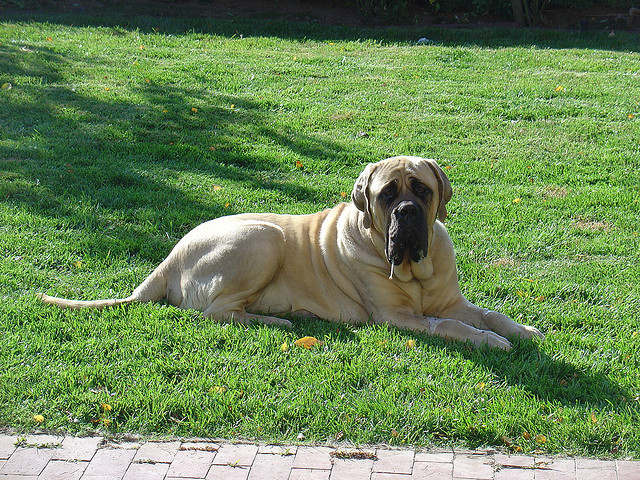

In [78]:
Image.open(dog_files_short[23])

In [79]:
### returns "True" if a dog is detected in the image stored at img_path
def resnet_dog_detector(img_path):
    ## TODO: Complete the function.
    
    #------------------------------------
    # Solution
    # ------------------------------------
    
    #use the predictor that we just created
    index = resnet_predict(img_path)
    
    return 151<=index & index <= 268 # true/false

In [80]:

humans = np.sum([resnet_dog_detector(path) for path in human_files_short])/len(human_files_short)
print('The Inception-v3 model in the case of humans misclassified {} '.format(humans))
dogs = np.sum([resnet_dog_detector(path) for path in dog_files_short])/len(dog_files_short)
print('The Inception-v3 model in the case of dog classified correctly: {}'.format(dogs))


The Inception-v3 model in the case of humans misclassified 0.0 
The Inception-v3 model in the case of dog classified correctly: 0.86


<span style="color:blue">**The performance of the resnet50 model surpass the performance of the VGG16 model in the str essed scenario! This is the model that we are going to use for the transfer learning.**</span>

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [38]:


import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_dir = '/data/dog_images/'

TRAIN = 'train'
TEST = 'test'
VAL = 'valid'

batch_size = 20

num_workers= 0


# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transforms = {
    TRAIN: transforms.Compose([
        # Data augmentation is a good practice for the train set
        # Here, we randomly crop the image to 224x224 and
        # randomly flip it horizontally. 
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomApply([transforms.RandomRotation(degrees =15)],p = 0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Normalize the values.
        
    ]),
    VAL: transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Normalize the values.
    ]),
    TEST: transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Normalize the values.
    ])
}


# pytorch way to load the data that is already organized 

image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x), 
        transform=data_transforms[x]
    )
    for x in [TRAIN, VAL, TEST]
}



train_loader = torch.utils.data.DataLoader(image_datasets[TRAIN],
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(image_datasets[VAL],
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(image_datasets[TEST],
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
loaders_scratch = {
    TRAIN: train_loader,
    VAL: valid_loader,
    TEST: test_loader
}



dataset_sizes = {x: len(image_datasets[x]) for x in [TRAIN, VAL, TEST]}

for x in [TRAIN, VAL, TEST]:
    print("Loaded {} images under {}".format(dataset_sizes[x], x))
    



Loaded 6680 images under train
Loaded 835 images under valid
Loaded 836 images under test


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

We decided to follow a procedure found in a [kaggle article](https://www.kaggle.com/carloalbertobarbano/vgg16-transfer-learning-pytorch) because pytorch's documentation was not very helpful. In this one, it is clear and the code snipets are clear. I used a similar procedure than the one depicted there. In this case, we added a normalization step, and a transformation to the training data (Horizontal flip and rotation). Additionally, we used [datasets.ImageFolder](https://pytorch.org/vision/stable/datasets.html#imagefolder) to load the images from an existing address and performing the transformations described below. 

The transformations come in a dictionary, and it is specified for each of the three groups, *Training*, *Validation*, and *Testing*. For the *Training* set of images we are going to perform a random flip with a probablity of 0.5, a rotation of 15 degrees with a probability of 0.5 and a random resize crop to 224 pixels. 

For the *Validation* and *Test* sets, we resize the images to 256 pixels and do a center crop of size 224 pixels. 

All of the pictures are then transformed into tensors and normalized.

I did not augmented the data set, I think that with the transformations performed, random flips, random rotation by 15 degrees we had enough variance in the same class and we did not need more data points.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [39]:
import torch.nn as nn 
import torch.nn.functional as F

In [40]:
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # convolutional layers
        
        # sees 224x224x3 image tensor
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # sees 112x112x16 tensor
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # sees 56x56x32 tensor
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # sees 28x28x64 tensor
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        # sees 14x14x128 tensor
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)

        #linear layer)
        self.fc1 = nn.Linear(7*7*256, 512)
        self.fc2 = nn.Linear(512, N_BREEDS) 
        # dropout layer
        self.dropout = nn.Dropout(0.20)
        
        # max pooling layers
        self.pool = nn.MaxPool2d(2, 2)
            
        self.batch_norm = nn.BatchNorm1d(512)
    
    def forward(self, x):
        ## Define forward behavior
        
        # sequence of conv and max pooling layer
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        
        x = x.view(-1, 7*7*256)
        
        x = F.relu(self.batch_norm(self.fc1(x))) 
        
        x = self.fc2(self.dropout(x))
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch_norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I tried many different architectures. The final architecture was a mix between readings, trials, errors and at the end guessing. Here is a description of the process that I took to solve this.
- From the literature, we can observe that the convolutional layers are the ones that are widespread and that is because they have a feature that make them 'detect' edges as they move through the image. Therefore, these are going to be present. These were found to be the main component. 
- The ReLU activation function got our attention as it is also easier for the computers to train with, without sacrificing on performance.
- Pooling layers: These are here to capture and join the results found in previous steps.  There is one pooling layer when we finish each convolutional layer to reduce the dimensions.
- The BatchNormalization can let us improve the performance.
    1. Convolutional Layer 1: Input: Image size 224x224x3
       Number of input channels at entry is 3.
       First, we are going to use filters of size 3 (3x3)
       stride = 1
       padding =1 
       out_channels = 16
    2. After this, activation with a ReLU 
    3. Maxpool with filter size 2x2 and a stride of 2. This reduces the picture to have size 112x112x32.
    
    4. Second conv. layer:
       in_channels = 16
       out_channels = 32
       Filter = 3 (3x3)
       Stride = 1
       Padding = 1
       Dimension in the output is 112x112x64. 
    5. Second activation with ReLU
    6. Maxpool. Pooling of 2x2 with stride of 2. This reduces the picture to size 56x56x32
    
    7. Third convolutional layer
       in_channel = 32
       out_channel = 64
       Filter = 3 (3x3)
       Stride = 1
       Padding = 1
    8. Third ReLU activation
    9. Maxpooling by a 2x2 and a Stride of 2 followed by an activation. Current size 28x28x64
    
    10. Fourth convolutional layer
        in_channel = 64
        out_channel = 128
        Filter = 3 (3x3)
        Stride = 1
        Padding = 1

    11. Fourth ReLU activation
    12. Maxpooling by a 2x2 and a Stride of 2 followed by an activation. Current size 14x14x128
     
    13. Third convolutional layer
        in_channel = 128
        out_channel = 256
        Filter = 3 (3x3)
        Stride = 1
        Padding = 1
        
    14. Fifth ReLU activation
    15. Maxpooling by a 2x2 and a Stride of 2 followed by an activation. Final size 7x7x256
    
    Final size is going to be 7x7x256. After this, a classification procedure is made with a two layer fullyconnected network. 
    16. Linear layer with 17x17x96 starting neurons and an outoup with 512
    17. Batch Normalization
    18. Activation with a ReLU
    19. Dropout
    20. Linear layer with 512 neurons and final layer with N_BREEDS (133) output neurons

    

This work was based on the paper mentioned above, additional to this resource, we tested and calculated by hand the different dimension to be sure that we are not going to explode in the number of neurons and parameters. 

The idea was to take the power of convolutional networks to make the most out of the pictures. With all the features learned, the best way to classify that we know is a fully connected network. Lucky us, this made the model to run properly and give the desired result. It is a really simple network.



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [41]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr= 0.001)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [44]:
# the following import is required for training to be robust to truncated images
import time
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    print('Starting with the training....')
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        time_start_epoch = time.time()
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
   
        # print training/validation statistics 
        print('Epoch: {} \tDuration: {:.2f} sec(s)\tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch,
            time.time() - time_start_epoch,
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(40, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Starting with the training....
Epoch: 1 	Duration: 78.72 sec(s)	Training Loss: 4.337917 	Validation Loss: 4.240235
Validation loss decreased (inf --> 4.240235).  Saving model ...
Epoch: 2 	Duration: 78.55 sec(s)	Training Loss: 4.324823 	Validation Loss: 4.228283
Validation loss decreased (4.240235 --> 4.228283).  Saving model ...
Epoch: 3 	Duration: 77.92 sec(s)	Training Loss: 4.321974 	Validation Loss: 4.221145
Validation loss decreased (4.228283 --> 4.221145).  Saving model ...
Epoch: 4 	Duration: 77.65 sec(s)	Training Loss: 4.310392 	Validation Loss: 4.199345
Validation loss decreased (4.221145 --> 4.199345).  Saving model ...
Epoch: 5 	Duration: 77.84 sec(s)	Training Loss: 4.300286 	Validation Loss: 4.187641
Validation loss decreased (4.199345 --> 4.187641).  Saving model ...
Epoch: 6 	Duration: 77.66 sec(s)	Training Loss: 4.283419 	Validation Loss: 4.182429
Validation loss decreased (4.187641 --> 4.182429).  Saving model ...
Epoch: 7 	Duration: 76.86 sec(s)	Training Loss: 4.273356

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [45]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
            
         
        
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.810543


Test Accuracy: 13% (112/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [46]:
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [53]:
## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [54]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), 0.001) 

for param in model_transfer.parameters():
    param.require_grad = False

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [55]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))



Starting with the training....
Epoch: 1 	Duration: 178.46 sec(s)	Training Loss: 3.577206 	Validation Loss: 1.013225
Validation loss decreased (inf --> 1.013225).  Saving model ...
Epoch: 2 	Duration: 178.32 sec(s)	Training Loss: 1.658173 	Validation Loss: 0.690492
Validation loss decreased (1.013225 --> 0.690492).  Saving model ...
Epoch: 3 	Duration: 177.95 sec(s)	Training Loss: 1.338541 	Validation Loss: 0.557687
Validation loss decreased (0.690492 --> 0.557687).  Saving model ...
Epoch: 4 	Duration: 178.29 sec(s)	Training Loss: 1.238113 	Validation Loss: 0.549265
Validation loss decreased (0.557687 --> 0.549265).  Saving model ...
Epoch: 5 	Duration: 178.33 sec(s)	Training Loss: 1.211053 	Validation Loss: 0.576540
Epoch: 6 	Duration: 178.28 sec(s)	Training Loss: 1.136625 	Validation Loss: 0.563343
Epoch: 7 	Duration: 178.24 sec(s)	Training Loss: 1.126729 	Validation Loss: 0.531452
Validation loss decreased (0.549265 --> 0.531452).  Saving model ...
Epoch: 8 	Duration: 178.44 sec(s)	

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [56]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.472173


Test Accuracy: 85% (718/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [57]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path)
    transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    transformed_image = transform(image).unsqueeze(0)
    
    if use_cuda:
        transformed_image = transformed_image.cuda()
    
    output = model_transfer(transformed_image)
    
    pred_index = torch.max(output,1)[1].item()
    
    return class_names[pred_index]



---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [82]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if resnet_dog_detector(img_path):
        print("Eureka! I think you are a dog!!!")
        img = Image.open(img_path)
        plt.imshow(img)
        plt.show()
        predict_breed = predict_breed_transfer(img_path)
        print("And to me, you are a: {}".format(predict_breed))
    
    elif face_detector(img_path):
        print("Hello human!!")
        img = Image.open(img_path)
        plt.imshow(img)
        plt.show()
        predict_breed = predict_breed_transfer(img_path)
        print("You look like a '{}', \n sorry for my honesty".format(predict_breed))
        

    else:
        print("Neither a human nor dog, sorry but I need better input!!!")
        img = Image.open(img_path)
        plt.imshow(img)
        plt.show()
    print("\n")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [83]:
def random_pictures(array, number):
    '''
    Function that calculates a number of random integers for the list
    Input:
    array (array): Array that we need to get a number of elements inside
    number (int): Number of elements to extract from the array. number less than or equal to len(array)
    output:
    numbers (array): Array that we are going to extract. 
    '''
    numbers = np.random.randint(low = 0, high=len(array),size=number)
    
    return numbers


Hello human!!


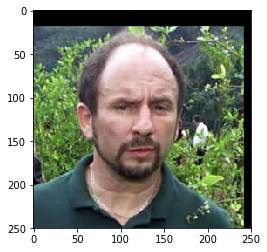

You look like a 'American water spaniel', 
 sorry for my honesty


Hello human!!


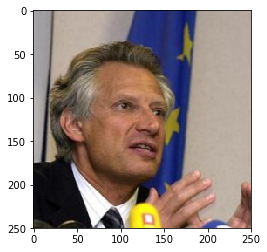

You look like a 'Pharaoh hound', 
 sorry for my honesty


Hello human!!


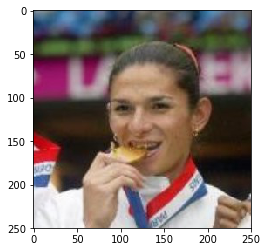

You look like a 'French bulldog', 
 sorry for my honesty


Hello human!!


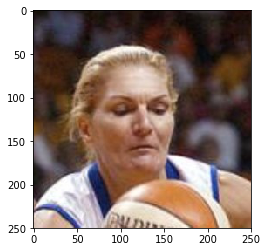

You look like a 'American water spaniel', 
 sorry for my honesty




In [84]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
humans = random_pictures(human_files, 4)
paths = [human_files[x] for x in humans]


for file in np.hstack(paths):
    run_app(file)

Eureka! I think you are a dog!!!


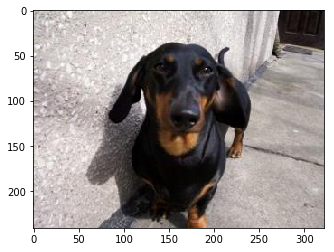

And to me, you are a: Dachshund


Eureka! I think you are a dog!!!


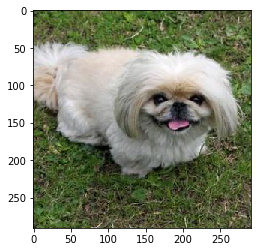

And to me, you are a: Pekingese


Hello human!!


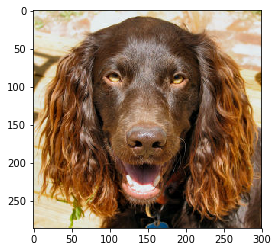

You look like a 'Boykin spaniel', 
 sorry for my honesty


Eureka! I think you are a dog!!!


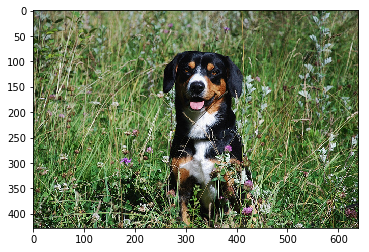

And to me, you are a: Entlebucher mountain dog




In [85]:

## suggested code, below
dogs = random_pictures(dog_files, 4)
paths_dogs = [dog_files[x] for x in dogs]


for file in np.hstack(paths_dogs):
    run_app(file)